# FM-223: Lista 4

Aluno: vinícius Freitas de Almeida

## Exercício 1

Ache o ponto de sela da Fig. 2.21 (p. 83) usando o método de Newton e compare com a solução analítica.

## Solução

Mapa de Hénon:

$$ f_{a,b}: \mathbb{R}^2 \to \mathbb{R}^2 \\ f(x,y) = (a - x^2 + by, x) $$

In [1]:
import numpy as np
import ctypes

In [2]:
def henon_a(v):
    return np.array([1.28 - v[0]**2 - 0.3*v[1], v[0]])

def jacobian_henon_a(v):
    return np.array([[-2*v[0], -0.3], [1, 0]])

def henon_b(v):
    return np.array([1.4 - v[0]**2 - 0.3*v[1], v[0]])

def jacobian_henon_b(v):
    return np.array([[-2*v[0], -0.3], [1, 0]])

def multivariate_newton(f, df, x0, eps=1e-5, max_iter=100):
    x = x0
    for _ in range(max_iter):
        dx = np.linalg.solve(df(x), -f(x))
        x = x + dx
        if np.linalg.norm(f(x)) < eps:
            return x
    return x

Para achar os pontos fixos analiticamente, basta resolver:

$$ f_{a,b}(x,y) = (x,y) \iff (a-x^2+by,x) = (x,y) \iff a-x^2+by = x \text{ e } x = y $$

Assim, o conjunto $F$ de pontos fixos de $f_{a,b}$ é o subconjunto de $\mathbb{R}^2$ dado por:

$$ F = \{ (x,y) \in \mathbb{R}^2 | x^2 + (1-b)x -a = 0 \text{ e } x = y \} $$

A equação quadrática resulta em:

$$ x = \frac{b-1 \pm \sqrt{(1-b)^2 + 4a}}{2} $$

In [3]:
def henon_fixed_points(a,b):
    delta = np.sqrt((1-b)**2 + 4*a)
    x1 = (b-1 + delta)/2
    x2 = (b-1 - delta)/2
    return [np.array([x1,x1]), np.array([x2,x2])]

Para achar os pontos fixos usando o método de Newton, basta resolver:

$$ f(\mathbf{x}) = \mathbf{x} $$

Que é equivalente a zerar a função $g$:

$$ g(\mathbf{x}) = f(\mathbf{x}) - \mathbf{x} = 0$$

Logo, a jacobiana de $g$ é:

$$ Dg(\mathbf{x}) = Df(\mathbf{x}) - \mathbf{I}$$

As iterações do método de Newton são dadas por:

$$ \mathbf{x}_{n+1} = \mathbf{x}_n - [Dg(\mathbf{x}_n)]^{-1} g(\mathbf{x}_n) $$

E são feitas até que $||g(\mathbf{x}_{n})|| < \epsilon$ ou até uma quantidade máxima de iterações $N$.

In [4]:
# item a)
print("Item a)")
ptos_fixos_a = henon_fixed_points(1.28, -0.3)
print(f"Pontos fixos para a = 1.28, b = -0.3: {ptos_fixos_a}")
# comparando com a solução pelo método de Newton
pto_fixo_mnewton = multivariate_newton(lambda x: henon_a(x)-x, lambda x: jacobian_henon_a(x) - np.eye(2), np.array([-2, -2]))
print(f"Ponto fixo obtido por Newton: {pto_fixo_mnewton}")
print(f"Norma da diferença entre o valor analítico do ponto fixo e o valor obtido por Newton: {np.linalg.norm(ptos_fixos_a[1] - pto_fixo_mnewton)}")
print()
# item b)
print("Item b)")
ptos_fixos_b = henon_fixed_points(1.4, -0.3)
print(f"Pontos fixos para a = 1.4, b = -0.3: {ptos_fixos_b}")
pto_fixo_mnewton = multivariate_newton(lambda x: henon_b(x)-x, lambda x: jacobian_henon_b(x) - np.eye(2), np.array([-2.5, -2.5]))
print(f"Ponto fixo obtido por Newton: {pto_fixo_mnewton}")
print(f"Norma da diferença entre o valor analítico do ponto fixo e o valor obtido por Newton: {np.linalg.norm(ptos_fixos_b[1] - pto_fixo_mnewton)}")

Item a)
Pontos fixos para a = 1.28, b = -0.3: [array([0.65479884, 0.65479884]), array([-1.95479884, -1.95479884])]
Ponto fixo obtido por Newton: [-1.95479905 -1.95479905]
Norma da diferença entre o valor analítico do ponto fixo e o valor obtido por Newton: 3.101420311160157e-07

Item b)
Pontos fixos para a = 1.4, b = -0.3: [array([0.7, 0.7]), array([-2., -2.])]
Ponto fixo obtido por Newton: [-2.00000096 -2.00000096]
Norma da diferença entre o valor analítico do ponto fixo e o valor obtido por Newton: 1.356560366007148e-06


## Exercício 2

Plote as variedades estável e instável do ponto de sela da Fig. 2.21 usando o algoritmo de You, Kostelich e Yorke, IJBC 1991.

Inverso do mapa de Hénon (existe apenas para $b \neq 0$):

$$ f^{-1}_{a,b}: \mathbb{R}^2 \to \mathbb{R}^2 \\ h(x,y) = f^{-1}(x,y) = \left(y, \frac{x-a+y^2}{b}\right) $$

Jacobiana:

$$ Dh = \begin{bmatrix} 0 & 1 \\ 1/b & 2y/b \end{bmatrix} $$

In [5]:
np2ctype = lambda numpy_array: (ctypes.c_double * len(numpy_array))(*numpy_array)

In [6]:
# Load the segplot shared library
segplot = ctypes.CDLL('./lib/segplot.so') 

# Define function argument and return types
segplot.calc_manifold.argtypes = (ctypes.c_int, ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                        ctypes.c_double*2, ctypes.c_double*2,
                                       np.ctypeslib.ndpointer(dtype=np.double),
                                       np.ctypeslib.ndpointer(dtype=np.double),
                                       ctypes.c_size_t)
segplot.calc_manifold.restype = None
n = 10
smax = 0.3
capacity = 100_000

In [7]:
def generate_manifold(a, b, saddle_point, n, smax, capacity, eigval, eigvec):
    is_unstable = 1 if np.abs(eigval) > 1 else 0
    x = np.full(capacity, np.nan, dtype=np.double)
    y = np.full(capacity, np.nan, dtype=np.double)
    segplot.calc_manifold(n, smax, a, b, np2ctype(saddle_point), np2ctype(eigvec), x, y, capacity, is_unstable)
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    # now go in the opposite direction
    xinv = np.full(capacity, np.nan, dtype=np.double)
    yinv = np.full(capacity, np.nan, dtype=np.double)
    segplot.calc_manifold(n, smax, a, b, np2ctype(saddle_point), np2ctype(-eigvec), xinv, yinv, capacity, is_unstable)
    xinv = xinv[~np.isnan(xinv)]
    yinv = yinv[~np.isnan(yinv)]

    x = np.concatenate((xinv[::-1], x))
    y = np.concatenate((yinv[::-1], y))
    return x, y

In [8]:
def generate_stable_unstable_manifolds(a, b, n=6, smax=0.2, capacity=100000):
    # desired fixed point
    fpoint = henon_fixed_points(a, b)[1]
    print("Fixed point: ", fpoint)
    # jacobian for inverse Hénon map
    jac = np.array([[0, 1], [1/b, 2*fpoint[1]/b]])
    e = np.linalg.eig(jac)
    unst_eigvec = None
    manifolds = {}

    for eigval, eigvec in zip(e.eigenvalues, e.eigenvectors):
        print(f"eigval, eigvec = {eigval, eigvec}")
        x, y = generate_manifold(a, b, fpoint, n, smax, capacity, eigval, eigvec)
        abs_eigval = np.abs(eigval)
        if abs_eigval > 1:
            print("Unstable eigenvector: ", eigvec)
            manifolds["unstable"] = (x,y)
        elif abs_eigval < 1:
            manifolds["stable"] = (x,y)
        else:
            manifolds["unclassified"] = (x,y)
    return manifolds

In [9]:
# item a)
a = 1.28
b = -0.3
manifolds_a = generate_stable_unstable_manifolds(a, b)

Fixed point:  [-1.95479884 -1.95479884]
eigval, eigvec = (0.26100834216194535, array([-0.96758447, -0.07806355]))
eigval, eigvec = (12.770983891637982, array([-0.25254762, -0.99694838]))
Unstable eigenvector:  [-0.25254762 -0.99694838]


stepsize reset from 7.27596e-17 to 1e-16 at s=4.76837e-12, m=6
stepsize reset from 7.27596e-17 to 1e-16 at s=4.76837e-12, m=6
stepsize reset from 7.27596e-17 to 1e-16 at s=0.0210475, m=6


In [10]:
# item b)
a = 1.4
b = -0.3
manifolds_b = generate_stable_unstable_manifolds(a, b)

Fixed point:  [-2. -2.]
eigval, eigvec = (0.25487197944288553, array([-0.96902149, -0.07623906]))
eigval, eigvec = (13.078461353890448, array([-0.24697642, -0.99708957]))
Unstable eigenvector:  [-0.24697642 -0.99708957]


stepsize reset from 7.27596e-17 to 1e-16 at s=5.36442e-12, m=6
stepsize reset from 7.27596e-17 to 1e-16 at s=5.96046e-12, m=6
stepsize reset from 7.27596e-17 to 1e-16 at s=0.0656244, m=6


In [11]:
def plot_manifolds(manifolds, ax):
    # only plot unstable and stable manifolds
    xst, yst = manifolds["stable"]
    ax.plot(xst, yst, 'k', linewidth=0.5)
    xunst, yunst = manifolds["unstable"]
    ax.plot(xunst, yunst, 'b', linewidth=0.5)

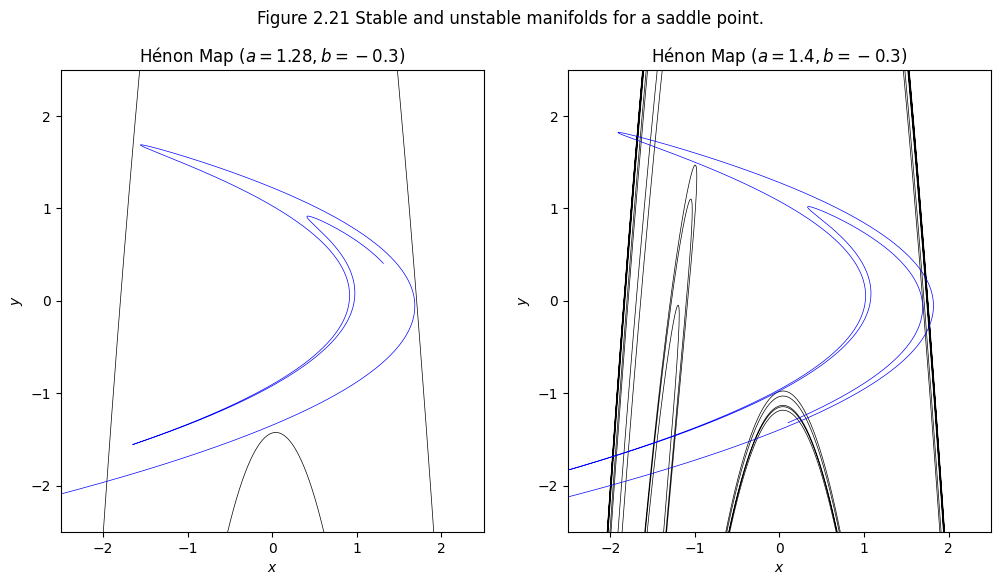

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax = axs[0]
plot_manifolds(manifolds_a, ax)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Hénon Map ($a=1.28, b=-0.3$)')

# Second plot
ax = axs[1]
plot_manifolds(manifolds_b, ax)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Hénon Map ($a=1.4, b=-0.3$)')

# legend
# unbounded_patch = mpatches.Patch(facecolor='black', label='Unbounded', edgecolor='gray')
# bounded_patch = mpatches.Patch(facecolor='white', label='Bounded', edgecolor='gray')
# leg = ax.legend(handles=[unbounded_patch, bounded_patch], loc='upper left', bbox_to_anchor=(1, 1))

# figure title
fig.suptitle('Figure 2.21 Stable and unstable manifolds for a saddle point.')

plt.show()

## Exercício 3

Reproduza a figura 6.3 da página 237 do livro.

Para o mapa logístico

$$ g_a(x) = a x (1 - x) $$

Tem-se

$$ g'_a(x) = a (1 - 2x) $$

Logo, o expoente de Lyapunov para o mapa logístico é

$$ \lambda(x) = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log |g'_a(x_i)| $$

Substituindo $g'_a(x)$, tem-se

$$ \lambda(a) = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log |a (1 - 2x_i)| $$

In [13]:
num_iterations = 1_000
dx = 1e-4
range_a = np.arange(1, 4, dx)
len_range = len(range_a)
num_points = num_iterations * len_range

# Preallocate arrays
av = np.empty(num_points)
xv = np.empty(num_points)
lv = np.zeros(len_range)

# range of x's for vectorized computation
x = np.random.rand(len_range)

for _ in range(200):  # Discard the first 200 iterates
    x = range_a * x * (1 - x)

for i in range(0, num_points, len_range):
    x = range_a * x * (1 - x)
    av[i:i+len_range] = range_a
    xv[i:i+len_range] = x
    lv += np.log(range_a * np.abs(1 - 2 * x))

lv /= num_iterations

Text(0.5, 0.98, 'Figure 6.3 Attractors and Lyapunov exponents for the logistic family of maps.')

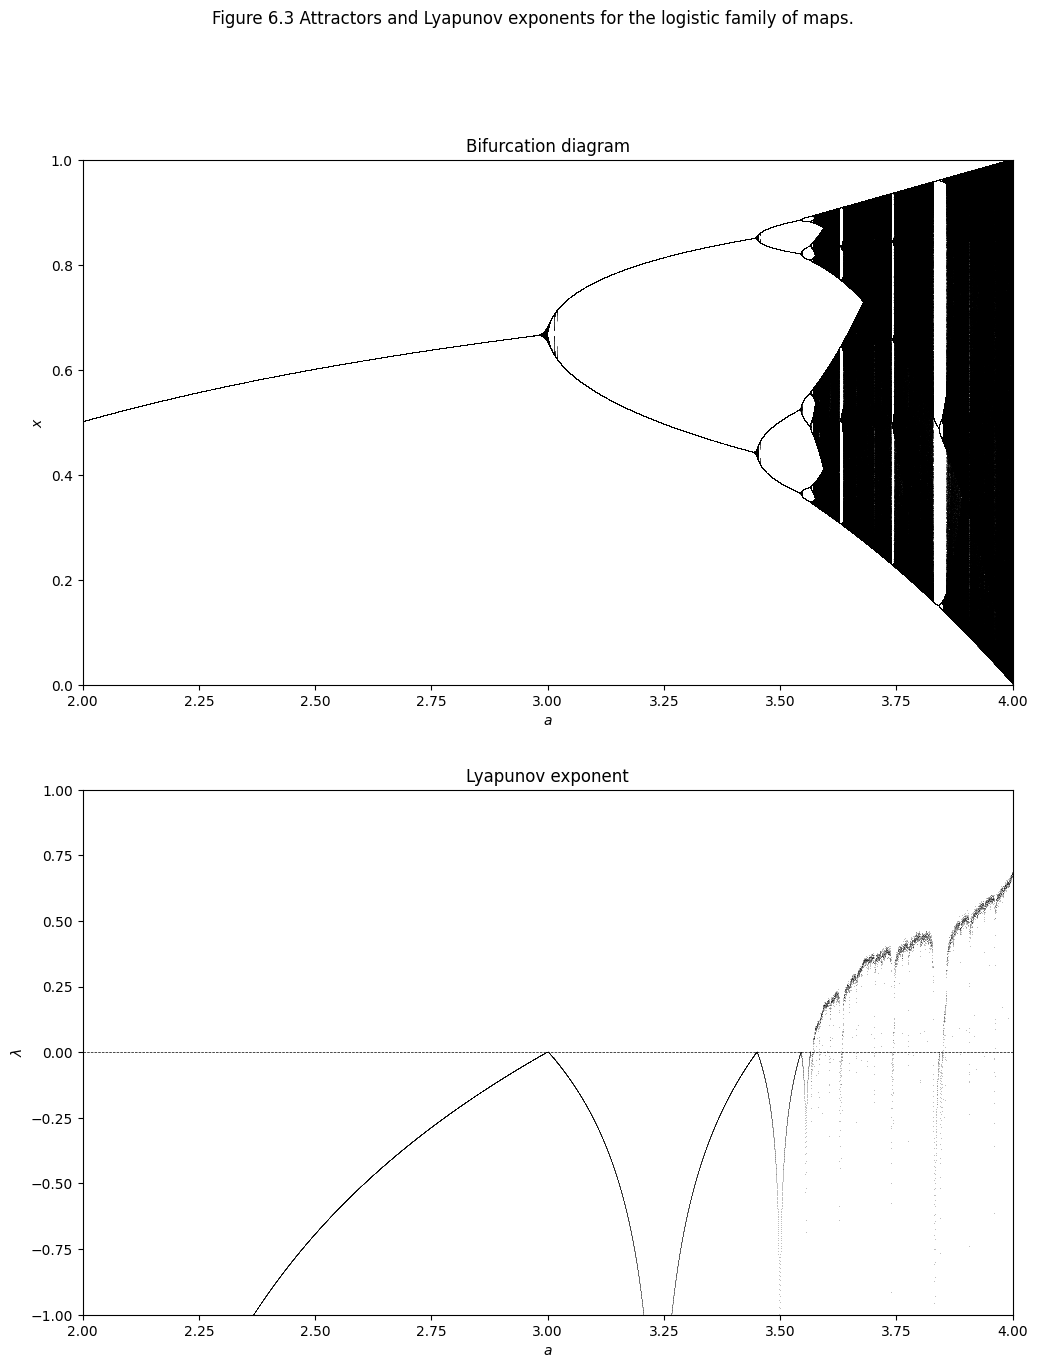

In [14]:
# Two subplot figure
# First (upper) subplo: bifurcation diagram
# Second (lower) subplot: Lyapunov exponent
fig, axs = plt.subplots(2, 1, figsize=(12, 15))

# First subplot
ax = axs[0]
ax.plot(av, xv, ',k', alpha=0.25, markersize=0.0001)
ax.set_xlim(2, 4)
ax.set_ylim(0, 1)
ax.set_xlabel('$a$')
ax.set_ylabel('$x$')
ax.set_title('Bifurcation diagram')

# Second subplot
ax = axs[1]
ax.plot(range_a, lv, ',k', alpha=0.25, markersize=0.1)
ax.set_xlim(2, 4)
ax.set_ylim(-1, 1)
ax.set_xlabel('$a$')
ax.set_ylabel('$\lambda$')
ax.set_title('Lyapunov exponent')
# horizontal line at zero
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)

# figure title
fig.suptitle('Figure 6.3 Attractors and Lyapunov exponents for the logistic family of maps.')
